___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.shape

(10000, 13)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
Exited,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000


In [10]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


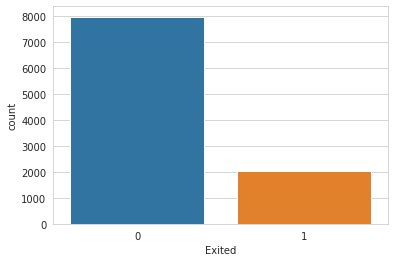

In [11]:
sns.countplot(df['Exited'])

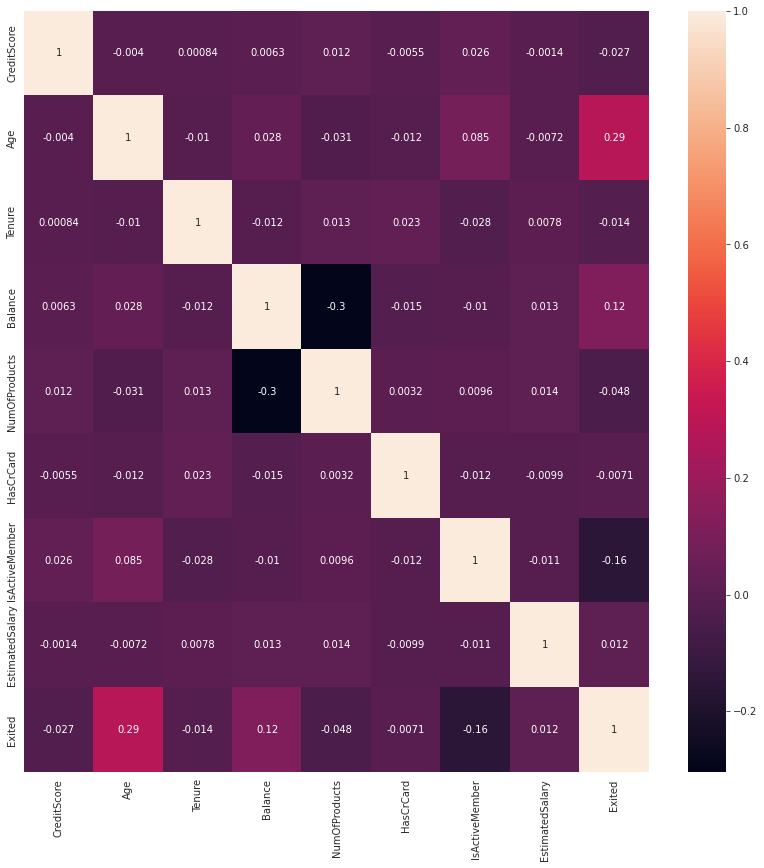

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True);

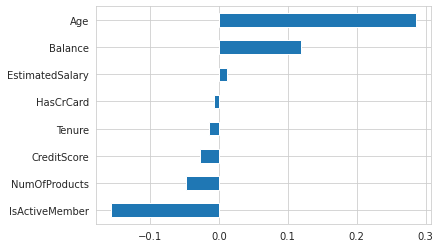

In [13]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

In [14]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.0000,1,1,1,101348.8800,1,0,0,0
2,608,41,1,83807.8600,1,0,1,112542.5800,0,0,1,0
3,502,42,8,159660.8000,3,1,0,113931.5700,1,0,0,0
4,699,39,1,0.0000,2,0,0,93826.6300,0,0,0,0
5,850,43,2,125510.8200,1,1,1,79084.1000,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
seed = 42

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [22]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [26]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 4ms/step - loss: 0.5035 - accuracy: 0.7948 - val_loss: 0.4443 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.8059 - val_loss: 0.4195 - val_accuracy: 0.8256
Epoch 3/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4319 - accuracy: 0.8122 - val_loss: 0.4002 - val_accuracy: 0.8344
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8183 - val_loss: 0.3844 - val_accuracy: 0.8389
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8248 - val_loss: 0.3627 - val_accuracy: 0.8556
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3902 - accuracy: 0.8327 - val_loss: 0.3395 - val_accuracy: 0.8689
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8406 - val_loss: 0.3252 - val_accuracy:

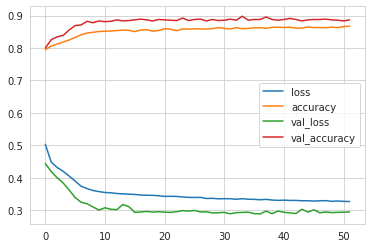

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                432       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [31]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



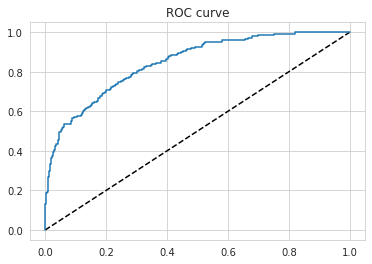

In [45]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')

plt.title('ROC curve')
plt.show()

In [34]:
roc_auc_score(y_test, y_pred_proba)

0.862221647452951

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [36]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [37]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [38]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6879 - recall: 0.2718 - val_loss: 0.6547 - val_recall: 0.4696
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6680 - recall: 0.5097 - val_loss: 0.6417 - val_recall: 0.5856
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6479 - recall: 0.6410 - val_loss: 0.6045 - val_recall: 0.6133
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6317 - recall: 0.6628 - val_loss: 0.5740 - val_recall: 0.6188
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6224 - recall: 0.6453 - val_loss: 0.6124 - val_recall: 0.7348
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6140 - recall: 0.6786 - val_loss: 0.5600 - val_recall: 0.6575
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6080 - recall: 0.6707 - val_loss: 0.5943 - val_recall: 0.7293
Epoch 8/200
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

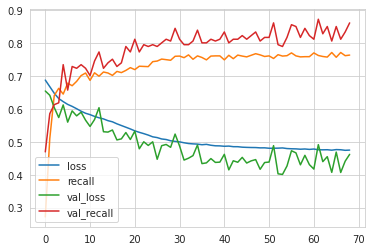

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[640 156]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.69      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



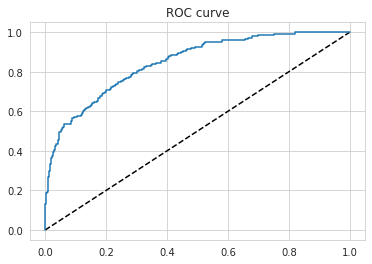

In [44]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')

plt.title('ROC curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [46]:
from tensorflow.keras.optimizers import Adam

In [47]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [48]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [49]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.4645 - accuracy: 0.8028 - val_loss: 0.4101 - val_accuracy: 0.8333
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8242 - val_loss: 0.3677 - val_accuracy: 0.8578
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3817 - accuracy: 0.8427 - val_loss: 0.3121 - val_accuracy: 0.8856
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8494 - val_loss: 0.3053 - val_accuracy: 0.8811
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8500 - val_loss: 0.3091 - val_accuracy: 0.8756
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8510 - val_loss: 0.2973 - val_accuracy: 0.8833
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8501 - val_loss: 0.3078 - val_accuracy:

In [51]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[762  34]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.74      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Add Dropout Layer

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [54]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.5823 - accuracy: 0.7600 - val_loss: 0.4983 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5243 - accuracy: 0.7953 - val_loss: 0.4761 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.7959 - val_loss: 0.4652 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.7960 - val_loss: 0.4591 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5006 - accuracy: 0.7960 - val_loss: 0.4614 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4873 - accuracy: 0.7960 - val_loss: 0.4489 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4795 - accuracy: 0.7962 - val_loss: 0.4439 - val_accuracy:

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 36)                432       
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_15 (Dense)            (None, 18)                666       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_16 (Dense)            (None, 9)                 171       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                

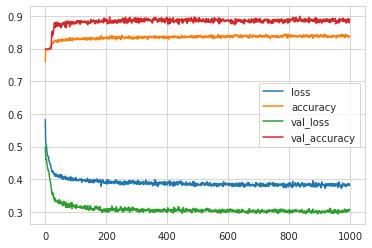

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [57]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[774  22]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.81      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.84      0.71      0.75      1000
weighted avg       0.86      0.86      0.85      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [58]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

#### Monitor the "val_recall" as metric

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3853 - accuracy: 0.8360 - val_loss: 0.3056 - val_accuracy: 0.8767
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8383 - val_loss: 0.3032 - val_accuracy: 0.8889
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.8372 - val_loss: 0.3012 - val_accuracy: 0.8822
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3833 - accuracy: 0.8386 - val_loss: 0.2990 - val_accuracy: 0.8844
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8373 - val_loss: 0.3077 - val_accuracy: 0.8856
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8409 - val_loss: 0.2955 - val_accuracy: 0.8856
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8404 - val_loss: 0.2993 - val_accuracy:

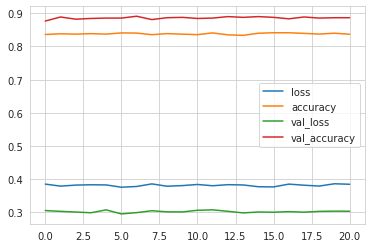

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## GridSearchCV

In [66]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [67]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [68]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [70]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [73]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: ignored

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Final Model and Model Deployment

In [74]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [75]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights) 

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


36/36 [==============================] - 1s 11ms/step - loss: 0.6787 - recall: 0.4441 - val_loss: 0.6552 - val_recall: 0.5049
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6434 - recall: 0.6077 - val_loss: 0.6511 - val_recall: 0.6716
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6198 - recall: 0.6558 - val_loss: 0.6451 - val_recall: 0.6912
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6054 - recall: 0.6781 - val_loss: 0.6592 - val_recall: 0.7304
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5925 - recall: 0.7130 - val_loss: 0.5731 - val_recall: 0.6275
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5813 - recall: 0.6934 - val_loss: 0.6549 - val_recall: 0.7500
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5740 - recall: 0.7081 - val_loss: 0.5740 - val_recall: 0.6814
Epoch 8/200
36/36 [==============================] -

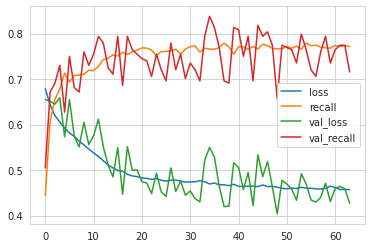

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4035443961620331
recall :  0.656862735748291


In [78]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[672 124]
 [ 70 134]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       796
           1       0.52      0.66      0.58       204

    accuracy                           0.81      1000
   macro avg       0.71      0.75      0.73      1000
weighted avg       0.83      0.81      0.81      1000



In [79]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.0000
Age                     42.0000
Tenure                   2.0000
Balance                  0.0000
NumOfProducts            1.0000
HasCrCard                1.0000
IsActiveMember           1.0000
EstimatedSalary     101348.8800
Geography_Germany        0.0000
Geography_Spain          0.0000
Gender_Male              0.0000
Name: 1, dtype: float64

In [80]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [81]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[1]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___